<a href="https://colab.research.google.com/github/tsungchi-source/HW/blob/main/0917_week2_%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99%E3%80%81K%E7%B7%9A%E3%80%81%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92_%E4%BB%A5%E5%8F%B0%E9%81%94%E9%9B%BB2308%E7%82%BA%E4%BE%8B_%E5%8A%89%E5%AE%97%E6%97%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>取得股價資料</b>

## 使用 Yahoo Finance 取得資料

In [72]:
!pip install yfinance

In [73]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [74]:
# 輸入股票代號_台達電2308
stock_id = "2308.tw"


'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取一年資料（現在-過去365天）
start = end - dt.timedelta(days=365)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-2892706488.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2024-09-19,384.657288,384.657288,375.814591,375.814591,7207787
1,2024-09-20,380.235962,390.552442,380.235962,388.096137,9136601
2,2024-09-23,383.674774,386.622340,382.200991,385.639818,5020496
3,2024-09-24,390.061157,390.061157,380.235939,383.674765,3850774
4,2024-09-25,391.043701,394.482528,388.096136,388.096136,8606574
...,...,...,...,...,...,...
238,2025-09-12,837.000000,854.000000,834.000000,834.000000,19279803
239,2025-09-15,836.000000,848.000000,829.000000,842.000000,11977009
240,2025-09-16,841.000000,841.000000,821.000000,833.000000,14964160
241,2025-09-17,836.000000,853.000000,831.000000,840.000000,10046309


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（SMA）

In [75]:
# 計算5日 SMA
df['5_SMA'] = df['Close'].rolling(window=5).mean()

# 計算10日 SMA
df['10_SMA'] = df['Close'].rolling(window=10).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail()

Price,Date,Close,High,Low,Open,Volume,5_SMA,10_SMA,20_SMA
238,2025-09-12,837.0,854.0,834.0,834.0,19279803,803.0,748.5,713.60
239,2025-09-15,836.0,848.0,829.0,842.0,11977009,825.0,763.3,721.00
240,2025-09-16,841.0,841.0,821.0,833.0,14964160,836.4,778.9,730.00
241,2025-09-17,836.0,853.0,831.0,840.0,10046309,836.2,794.5,740.55
242,2025-09-18,892.0,899.0,837.0,837.0,21414831,848.4,814.6,752.75


## 1.2 計算相對強弱指數（RSI）

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [76]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

Price,Date,Close,High,Low,Open,Volume,5_SMA,10_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
238,2025-09-12,837.0,854.0,834.0,834.0,19279803,803.0,748.5,713.60,6.0,6.0,0.0,14.928571,3.428571,4.354167,81.322957
239,2025-09-15,836.0,848.0,829.0,842.0,11977009,825.0,763.3,721.00,-1.0,0.0,1.0,14.285714,3.500000,4.081633,80.321285
240,2025-09-16,841.0,841.0,821.0,833.0,14964160,836.4,778.9,730.00,5.0,5.0,0.0,12.142857,3.500000,3.469388,77.625571
241,2025-09-17,836.0,853.0,831.0,840.0,10046309,836.2,794.5,740.55,-5.0,0.0,5.0,12.142857,3.071429,3.953488,79.812207
242,2025-09-18,892.0,899.0,837.0,837.0,21414831,848.4,814.6,752.75,56.0,56.0,0.0,16.000000,3.071429,5.209302,83.895131


## 1.3 計算平滑異同移動平均線（MACD）

In [77]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算5天的指數移動平均線（EMA），並將其存儲在 'EMA_5' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()

# 計算10天的指數移動平均線（EMA），並將其存儲在 'EMA_10' 列中
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()

# 計算MACD線：5天EMA減去10天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_5'] - df['EMA_10']

# 顯示DataFrame的最後幾行數據
df.head(3)

Price,Date,Close,High,Low,Open,Volume,5_SMA,10_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_5,EMA_10,MACD
0,2024-09-19,384.657288,384.657288,375.814591,375.814591,7207787,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,384.657288,384.657288,0.000000
1,2024-09-20,380.235962,390.552442,380.235962,388.096137,9136601,NaN,NaN,NaN,-4.421326,0.000000,4.421326,NaN,NaN,NaN,NaN,383.183512,383.853410,-0.669898
2,2024-09-23,383.674774,386.622340,382.200991,385.639818,5020496,NaN,NaN,NaN,3.438812,3.438812,0.000000,NaN,NaN,NaN,NaN,383.347266,383.820931,-0.473665


# <b>2. 資料可視化</b>
K 線型態的捕捉

# 2.0 載入matplotlib繪圖時之中文字體

In [78]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-09-19 15:37:18--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.64.101, 173.194.64.139, 173.194.64.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.64.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-19 15:37:18--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   100MB/s    in 0.2s    

2025-09-19 15:37:

## 2.1 可視化收盤價折線圖

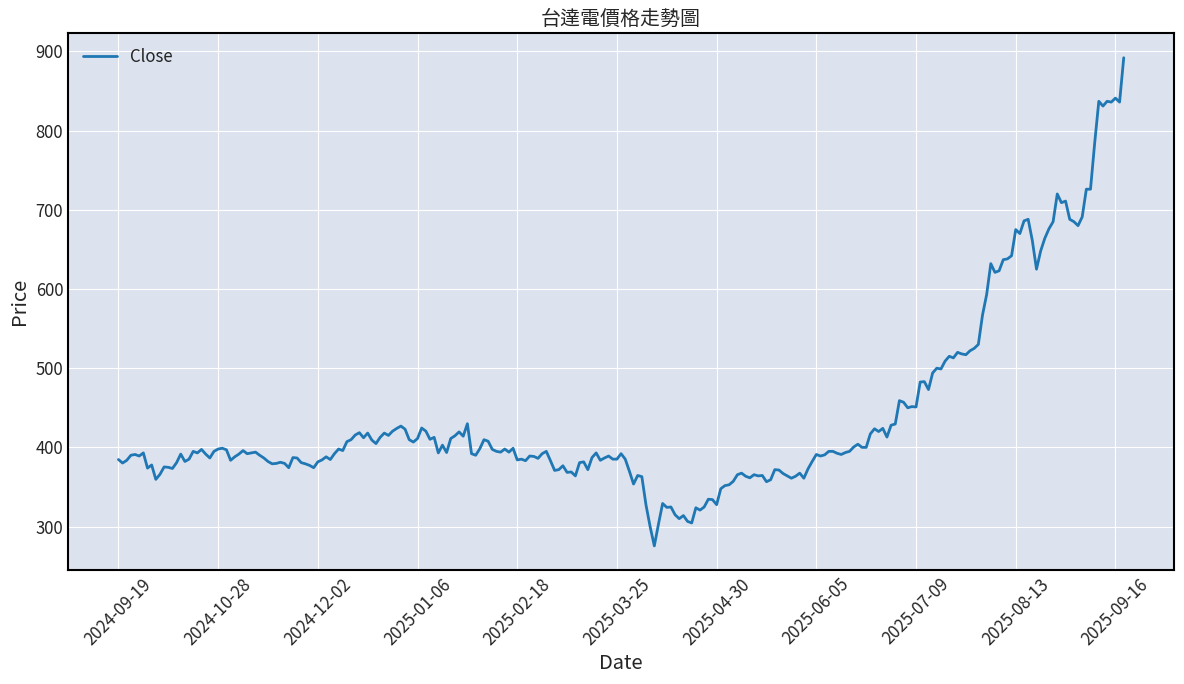

In [79]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'台達電價格走勢圖')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

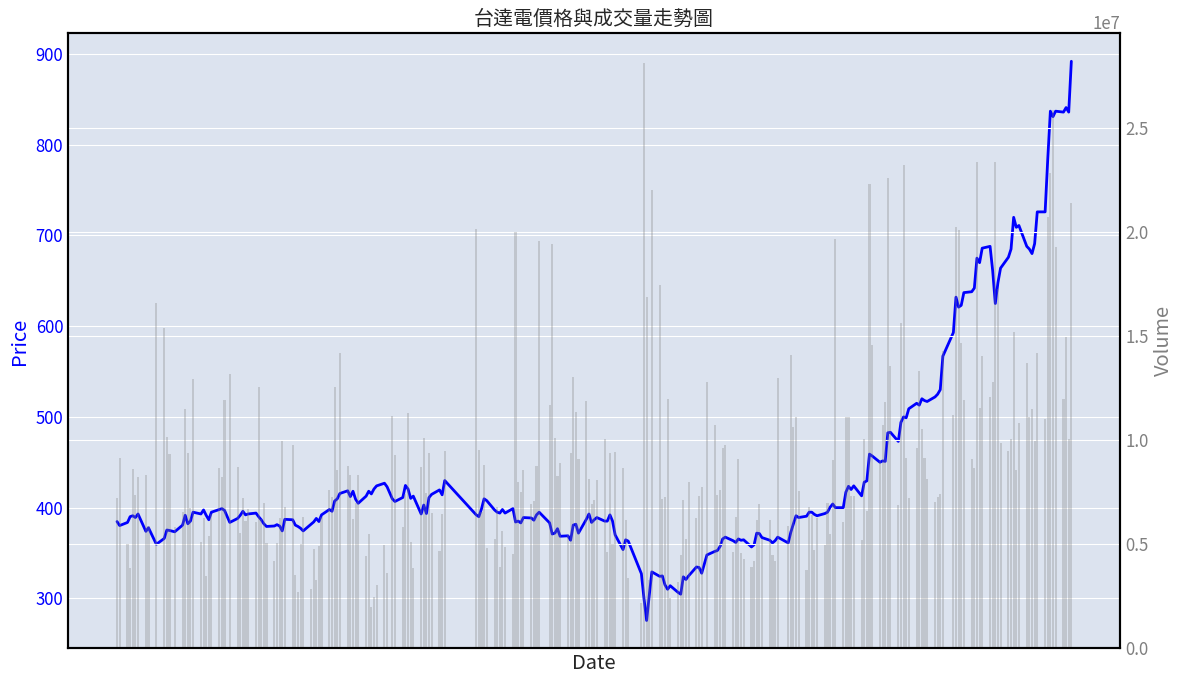

In [80]:
# import matplotlib.pyplot as plt

# 畫布尺寸大小設定
fig, ax1 = plt.subplots(figsize=(12, 7))

# 主軸：繪製收盤價
ax1.plot(df['Date'], df['Close'], label='Close', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 設定 x 軸的時間標籤
num = 10
date_labels = df["Date"].dt.strftime('%Y-%m-%d')
ax1.set_xticks(df.index[::len(df)//num])
ax1.set_xticklabels(date_labels[::len(df)//num], rotation=45)

# 副軸：繪製成交量（柱狀圖）
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], label='Volume', color='gray', alpha=0.3)
ax2.set_ylabel('Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# 標題與圖例
plt.title('台達電價格與成交量走勢圖')
fig.tight_layout()
plt.show()

## 2.2 加入技術指標

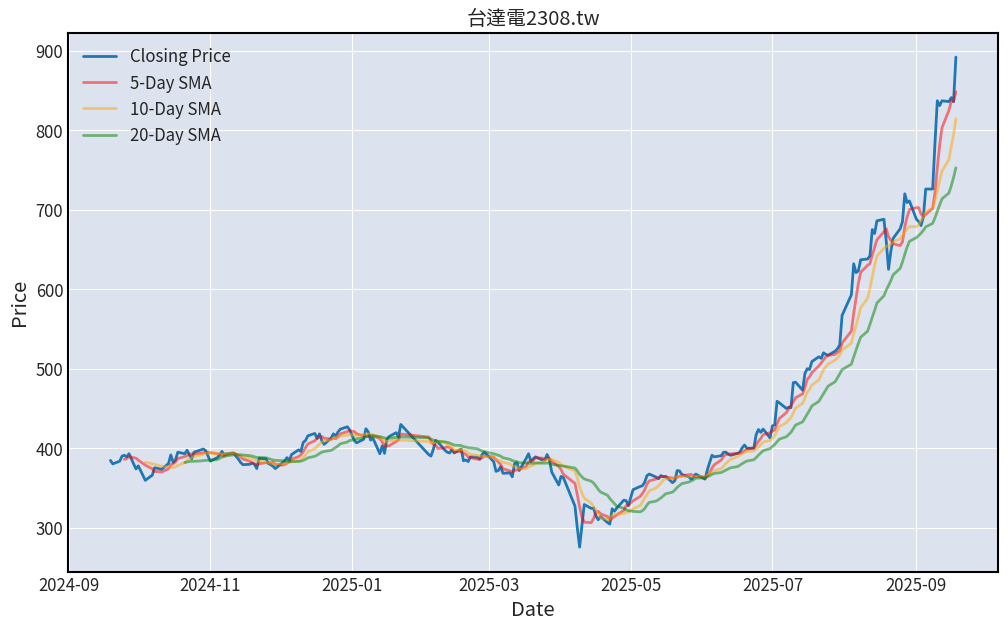

In [81]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['5_SMA'], label='5-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['10_SMA'], label='10-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'台達電{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [82]:
!pip install mplfinance

In [83]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-17'].tail()

Price,Close,High,Low,Open,Volume,5_SMA,10_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_5,EMA_10,MACD
Date,,,,,,,,,,,,,,,,,,
2025-09-11,831.0,853.0,825.0,825.0,25892416,780.8,735.9,706.05,-6.0,0.0,6.0,15.357143,3.428571,4.479167,81.749049,789.400268,753.636692,35.763576
2025-09-12,837.0,854.0,834.0,834.0,19279803,803.0,748.5,713.60,6.0,6.0,0.0,14.928571,3.428571,4.354167,81.322957,805.266846,768.793657,36.473188
2025-09-15,836.0,848.0,829.0,842.0,11977009,825.0,763.3,721.00,-1.0,0.0,1.0,14.285714,3.500000,4.081633,80.321285,815.511230,781.012992,34.498238
2025-09-16,841.0,841.0,821.0,833.0,14964160,836.4,778.9,730.00,5.0,5.0,0.0,12.142857,3.500000,3.469388,77.625571,824.007487,791.919721,32.087766
2025-09-17,836.0,853.0,831.0,840.0,10046309,836.2,794.5,740.55,-5.0,0.0,5.0,12.142857,3.071429,3.953488,79.812207,828.004991,799.934317,28.070674


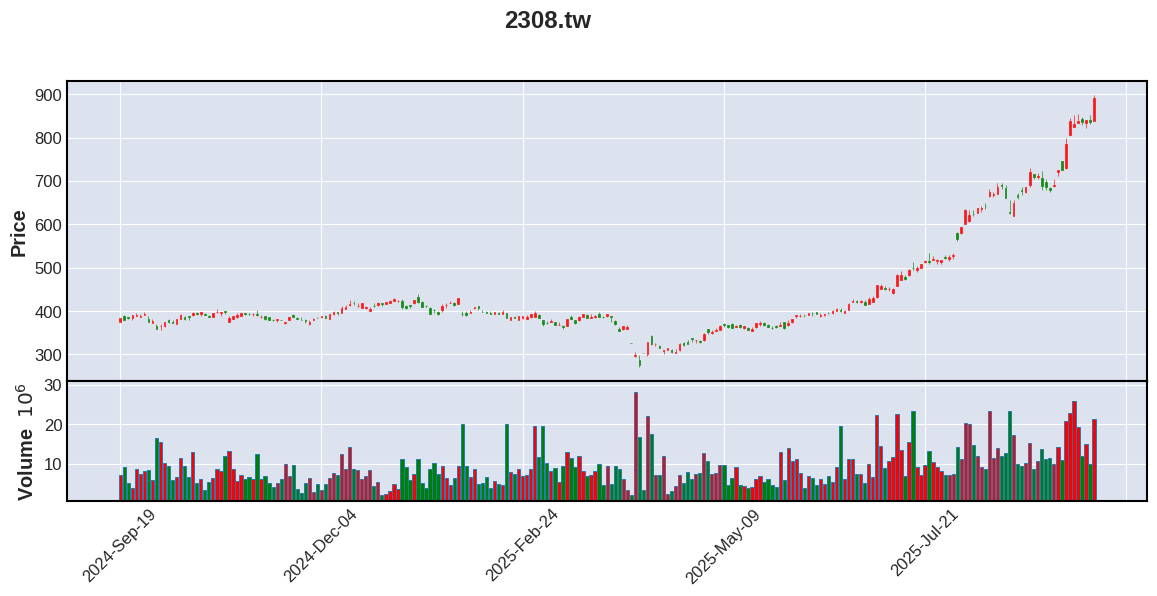

In [84]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖，以及成交量

mpf.plot(kplot_df,
         type='candle',
         style=my_style,
         title=f'{stock_id}',
         figsize=(15, 6),
         volume=True)



## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [85]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

#print('df',df)
# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

Price,Close,High,Low,Open,Volume,5_SMA,10_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_5,EMA_10,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-17,385.148560,387.604864,378.762168,387.604864,6769479,382.594000,376.649744,NaN,2.947571,2.947571,...,3.263375,3.614275,0.902913,47.448985,382.703053,380.867591,1.835463,2.456305,6.386392,0.0
2024-12-10,395.956299,397.430082,391.534951,397.430082,7292463,391.731458,385.541568,383.650214,-1.965057,0.000000,...,2.842298,1.684326,1.687499,62.790680,392.200448,388.598227,3.602221,1.473783,4.421348,0.0
2025-03-27,385.148560,388.096125,374.832080,388.096125,5016744,387.310107,385.885452,381.021967,-6.877655,0.000000,...,3.684455,2.491392,1.478874,59.659104,386.867451,385.489421,1.378030,2.947566,10.316479,0.0
2025-04-29,334.057434,334.057434,326.197259,333.074912,7308691,327.572778,318.779205,322.635605,-0.491241,0.000000,...,6.491662,2.315944,2.803031,73.705181,327.603352,324.379806,3.223546,0.982522,6.877653,0.0


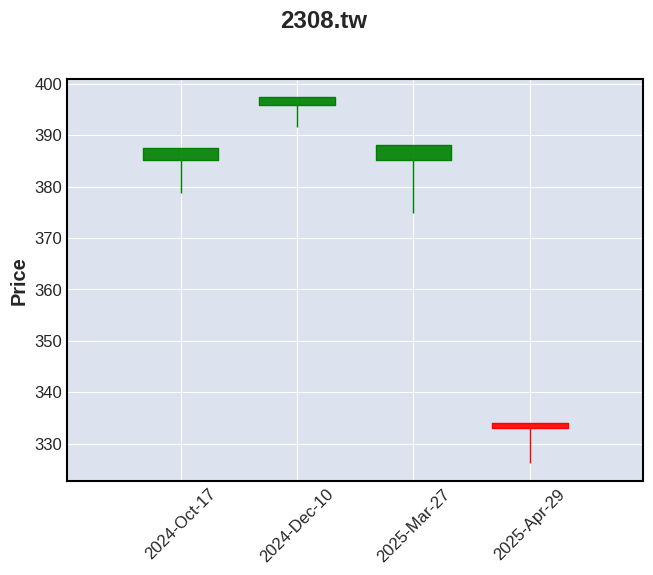

In [86]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [87]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,5_SMA,10_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_5,EMA_10,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-07,365.989380,370.901989,357.146683,365.006858,15414148,374.046057,380.432452,NaN,6.386383,6.386383,...,NaN,NaN,NaN,NaN,371.765858,377.019392,-5.253534,0.982522,7.860175,4.912609
2024-10-28,397.921356,405.781531,394.482530,396.938834,8652651,393.696503,391.534952,383.944969,2.947571,2.947571,...,4.000268,1.719413,2.326532,69.938660,393.736716,390.757661,2.979056,0.982522,2.456305,7.860175
2024-11-08,393.008728,395.956293,391.043684,393.008728,6679657,392.124463,393.303491,390.478740,0.982513,0.982513,...,2.140494,2.280855,0.938461,48.412688,392.606750,392.077447,0.529302,0.000000,1.965044,2.947565
2024-11-18,379.744690,382.200995,376.797124,379.744690,4209054,383.576520,388.440002,390.675243,0.491272,0.491272,...,1.122881,2.421215,0.463768,31.683151,383.112505,386.145388,-3.032883,0.000000,2.947566,2.456305
2024-11-20,379.744690,379.744690,379.744690,379.744690,6252197,380.432452,385.787195,389.201460,-1.473785,0.000000,...,1.157972,2.386124,0.485294,32.673273,381.569005,384.248696,-2.679691,0.000000,0.000000,0.000000
2024-11-27,379.253418,386.131071,379.253418,379.253418,2711116,381.611481,381.021967,386.106516,-1.473785,0.000000,...,1.193063,2.105406,0.566667,36.170209,381.430405,382.583541,-1.153136,0.000000,0.000000,6.877653
2024-12-03,384.166046,387.113612,383.183524,384.166046,4794785,379.351678,380.530707,383.969531,2.456329,2.456329,...,1.754506,1.929956,0.909091,47.619056,380.944958,381.210724,-0.265766,0.000000,0.982522,2.947566
2024-12-16,418.554291,421.993117,414.132943,418.554291,8747143,409.416846,399.395126,389.815538,2.947571,2.947571,...,3.544098,0.842163,4.208327,80.799978,410.267602,402.490284,7.777318,0.000000,4.421348,3.438826
2024-12-23,412.659180,417.571789,409.711614,412.659180,4464278,411.381891,410.399368,397.209013,7.860199,7.860199,...,3.824820,1.789597,2.137253,68.124979,410.589439,407.841047,2.748392,0.000000,2.947566,4.912609


In [88]:
doji_df.index

DatetimeIndex(['2024-10-07', '2024-10-28', '2024-11-08', '2024-11-18',
               '2024-11-20', '2024-11-27', '2024-12-03', '2024-12-16',
               '2024-12-23', '2024-12-31', '2025-01-10', '2025-01-14',
               '2025-01-17', '2025-02-03', '2025-02-10', '2025-03-05',
               '2025-03-10', '2025-04-07', '2025-04-10', '2025-05-27',
               '2025-06-09', '2025-06-11', '2025-06-17', '2025-07-16',
               '2025-07-22', '2025-08-07', '2025-08-12', '2025-08-20',
               '2025-09-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

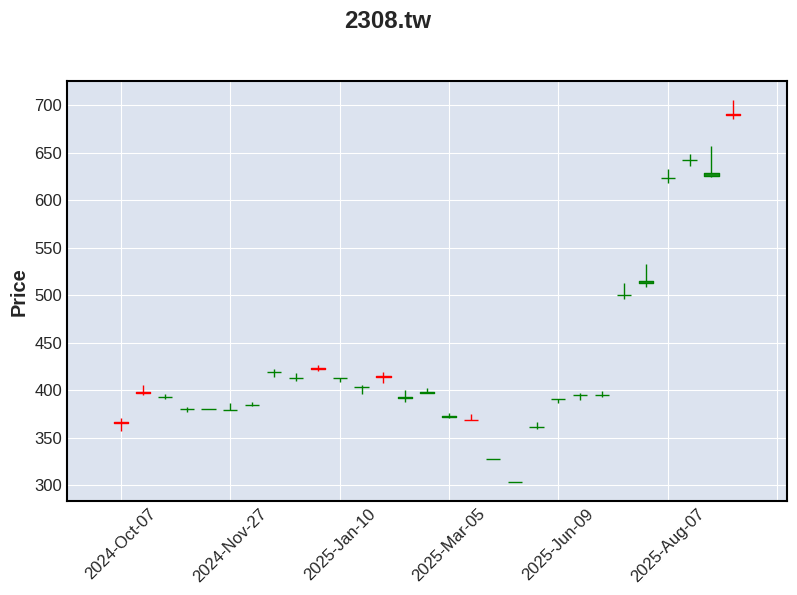

In [89]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [90]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [91]:
# 標籤: 預測未來1天的價格，舉例說明:用技術指標預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((223, 3), (223,))

In [92]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((178, 3), (45, 3), (178,), (45,))

## 3.2 線性回歸（Linear Regression）

In [93]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 26.57
線性回歸模型預測未來1天的價格: 836.61


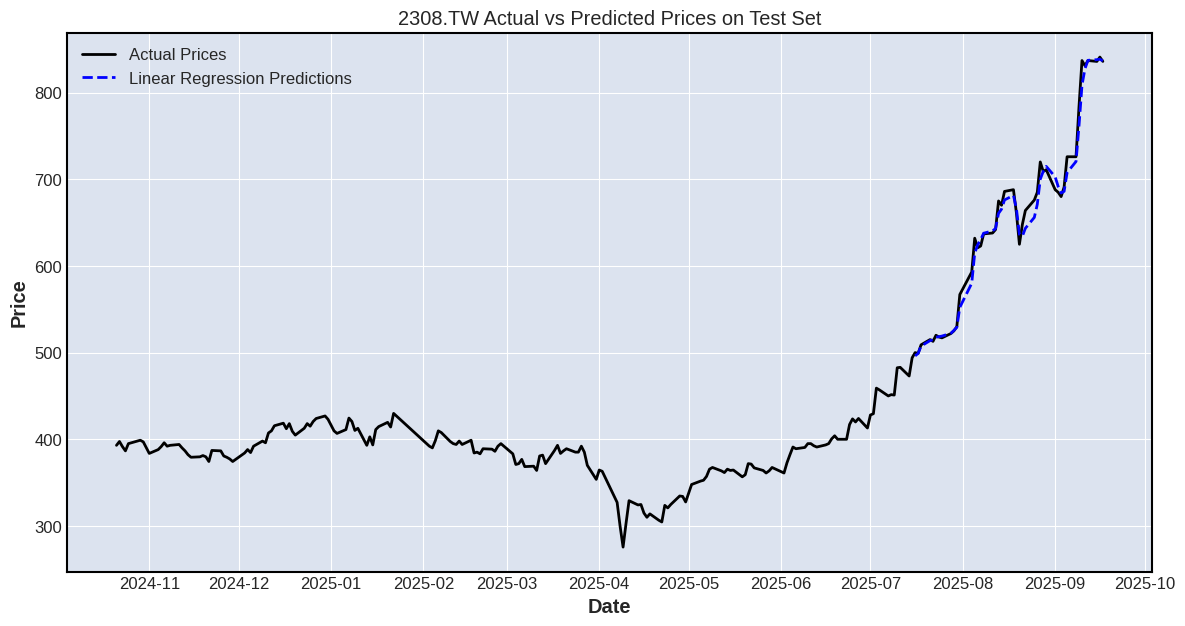

In [94]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2308.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 決策樹（Decision Tree）

In [95]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 207.56
決策樹模型預測未來1天的價格: 500.00


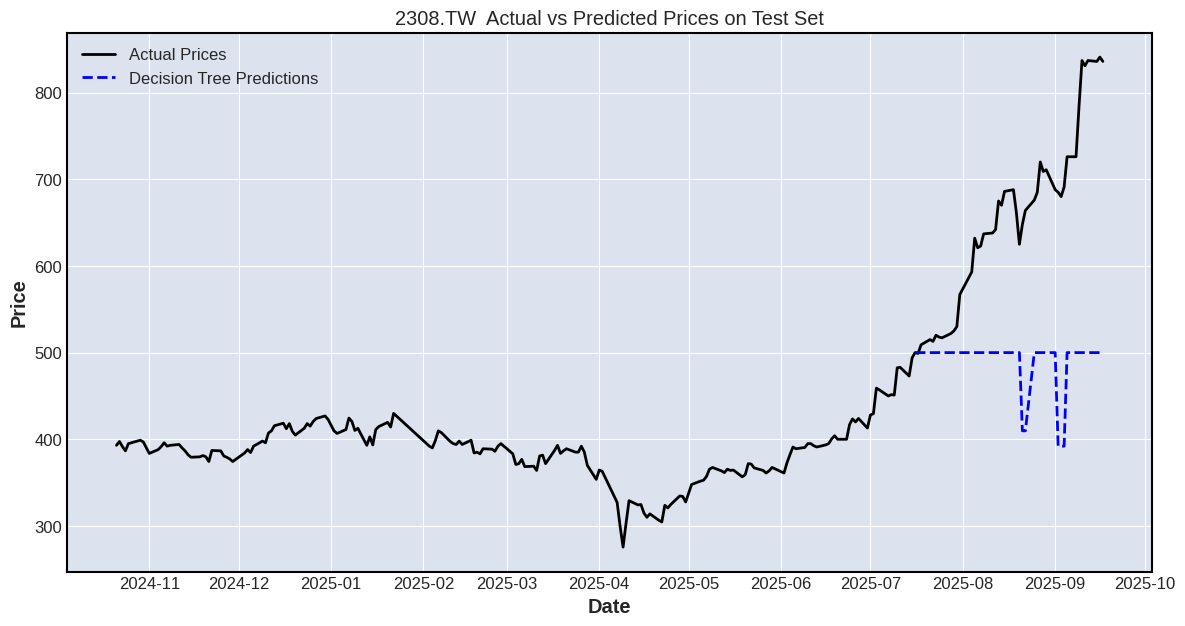

In [96]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2308.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 隨機森林（Random Forest）

In [97]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 212.05
隨機森林模型預測未來1天的價格: 489.68


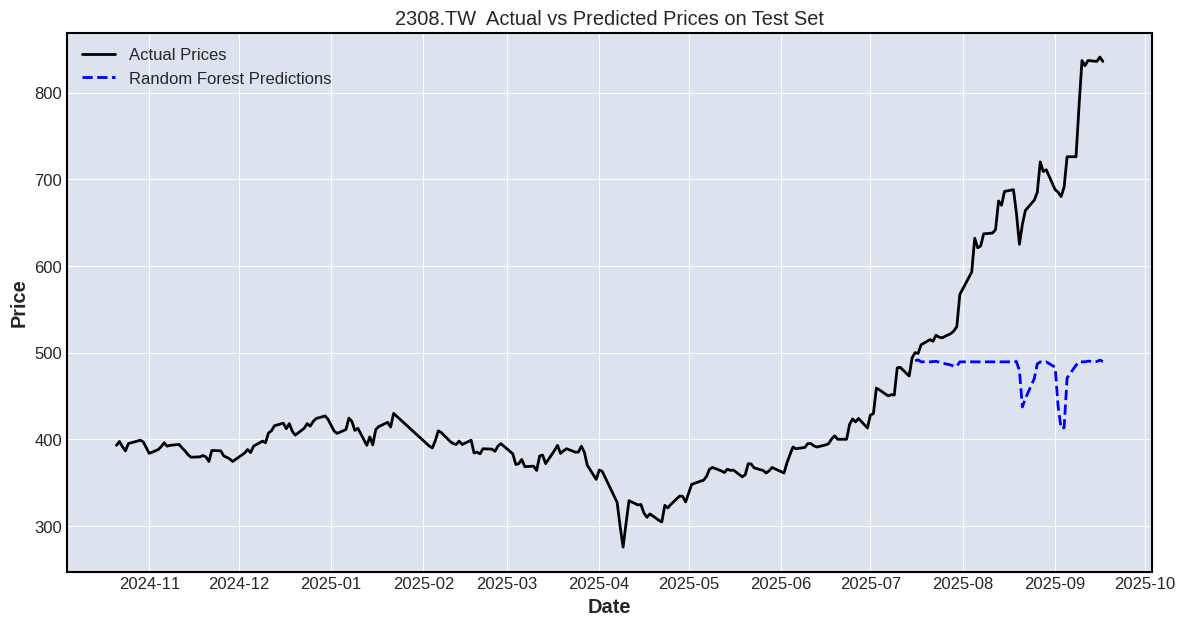

In [98]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2308.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 補充：在 Colab 上使用中文字體

In [99]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-09-19 15:37:39--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.64.101, 173.194.64.139, 173.194.64.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.64.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-19 15:37:39--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   129MB/s    in 0.2s    

2025-09-19 15:37:

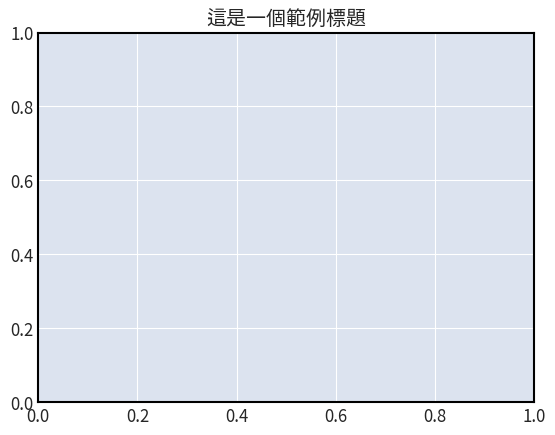

In [100]:
# 繪製範例圖表
plt.title("這是一個範例標題")
plt.show()

# Pandas Shift

In [101]:
temp_df = pd.DataFrame({
    'Date': ['2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16'],
    'Close': [111, 222, 333, 444, 555, 666]
})
temp_df

,Date,Close
0,2024-10-11,111
1,2024-10-12,222
2,2024-10-13,333
3,2024-10-14,444
4,2024-10-15,555
5,2024-10-16,666


In [102]:
temp_df['Future'] = temp_df['Close'].shift(-1)
temp_df

,Date,Close,Future
0,2024-10-11,111,222.0
1,2024-10-12,222,333.0
2,2024-10-13,333,444.0
3,2024-10-14,444,555.0
4,2024-10-15,555,666.0
5,2024-10-16,666,NaN


In [103]:
temp_df.dropna(inplace=True)
temp_df

,Date,Close,Future
0,2024-10-11,111,222.0
1,2024-10-12,222,333.0
2,2024-10-13,333,444.0
3,2024-10-14,444,555.0
4,2024-10-15,555,666.0


In [104]:
sk_df = pd.DataFrame({
    'Date': ['2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16'],
    '技術指標1': [111, 222, 333, 444, 555, 666],
    '技術指標2': [111, 222, 333, 444, 555, 666],
    '技術指標3': [111, 222, 333, 444, 555, 666],
    '技術指標4': [111, 222, 333, 444, 555, 666],
    'Close': [356, 363, 368, 370, 374, 366]
})
sk_df

,Date,技術指標1,技術指標2,技術指標3,技術指標4,Close
0,2024-10-11,111,111,111,111,356
1,2024-10-12,222,222,222,222,363
2,2024-10-13,333,333,333,333,368
3,2024-10-14,444,444,444,444,370
4,2024-10-15,555,555,555,555,374
5,2024-10-16,666,666,666,666,366


In [105]:
n = 3
sk_df.iloc[-n:]

,Date,技術指標1,技術指標2,技術指標3,技術指標4,Close
3,2024-10-14,444,444,444,444,370
4,2024-10-15,555,555,555,555,374
5,2024-10-16,666,666,666,666,366
